# Import Overlay
导入Overlay

In [1]:
import pynq.lib.dma
import numpy as np
hmol = pynq.Overlay("./huffman/huffman.bit")

dma0 = hmol.axi_dma_0
dma1 = hmol.axi_dma_1

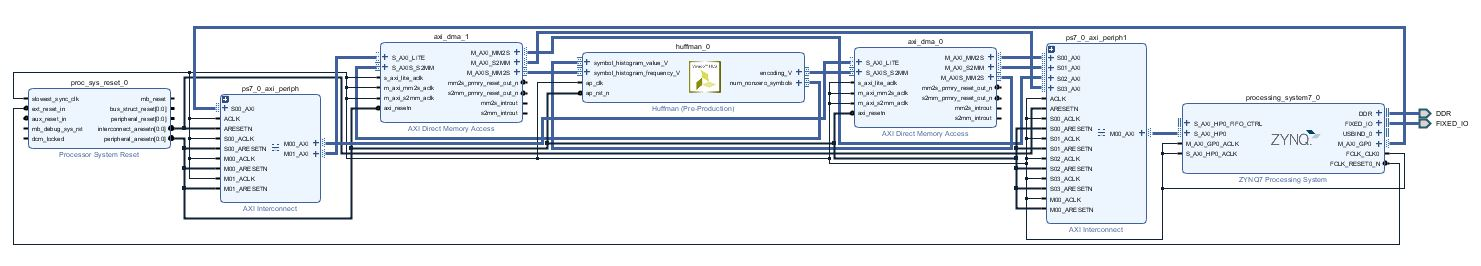

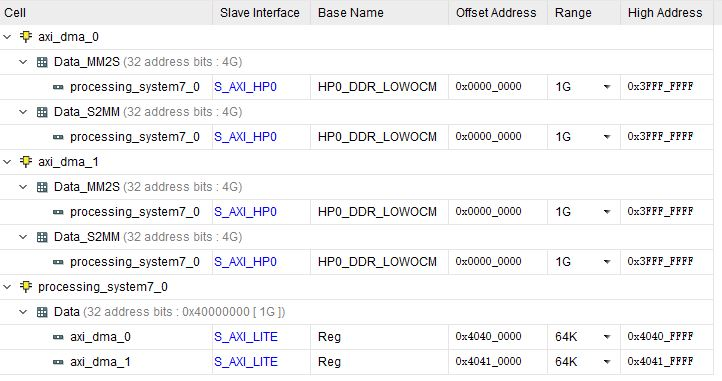

In [2]:
#生成输入数据,并输出结果
data = []
frequency = np.zeros(256, dtype = np.uint32)
with open("./huffman/huffman256.txt") as f:
    for line in f:
        data.append(line.split("\n"))

for i in range(256):
    frequency[i] = int(data[i][0],16)

from pynq import Xlnk
xlnk = Xlnk()
inputvalue = xlnk.cma_array(shape=(256,), dtype=np.uint16)
inputfrequency = xlnk.cma_array(shape=(256,), dtype=np.uint32)
encoding_v = xlnk.cma_array(shape=(256,), dtype=np.uint32)
num_nonzero_symbol = xlnk.cma_array(shape=(1,), dtype=np.int)


for i in range(256):
    inputvalue[i] = i
    inputfrequency[i] = frequency[i]
    

dma0.sendchannel.transfer(inputvalue)
dma1.sendchannel.transfer(inputfrequency)
dma0.recvchannel.transfer(encoding_v)
dma1.recvchannel.transfer(num_nonzero_symbol)

encoding_v

ContiguousArray([1048560,    3016,    2281,       7,    7112,    1992,
                   10473,    2055,    1031,    3079,   15850,     519,
                    6088,    4040,    6377,   65517,   12267,   14569,
                   32234,    1002,    2567,    8136,   17386,  524271,
                  131054,      40,    4136,    2088,    6184,    1064,
                    9194,    5160,    3112,    1257,   45035,    7208,
                    1543,    3591,     552,    9449,     263,    4648,
                    2311,    1287,    2600,   25578,    6696,    5353,
                    3335,   13545,     775,    2823,    1799,    3847,
                    1576,    5672,    3305,   11497,     135,  196589,
                    3624,    5098,    7720,   28651,  393198,    2183,
                    7401,   15593,     296,    4392,    1159,    2344,
                    6440,     745,    3207,    1320,    5416,     647,
                    2695,   21482,    3368,    7464,     808,    4904,
      